In [81]:
import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt

os.getcwd()

'n:\\Torbedo\\Software Traning\\img\\Image Processing Session 3\\tasks\\Task3'

In [82]:
def make_fig(images, titles, plots, size):
    fig = plt.figure(figsize=size)
    for i in range(len(images)):
        fig.add_subplot(plots[0], plots[1], i+1)
        image = images[i]
        plt.imshow(image[:,:,::-1]) # converting from bgr to rgb
        plt.title(titles[i])
    plt.show()

def make_fig_gray(images, titles, plots, size):
    fig = plt.figure(figsize=size)
    for i in range(len(images)):
        fig.add_subplot(plots[0], plots[1], i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
    plt.show()

def display_image(image, title='original', colored=None):
    plt.figure(figsize=(10, 10))
    if colored:
        plt.imshow(image[:,:,::-1]) # converting from bgr to rgb
    else:
        plt.imshow(image, cmap='gray')
    plt.axis("off")
    plt.title(title)
    plt.show()

def display2Images(img1, img2):
    fig= plt.figure(figsize=(10,20))
    fig.add_subplot(1, 2, 1)
    plt.imshow(img1, cmap='gray')
    plt.axis('off')
    plt.title("First")
    
    fig.add_subplot(1, 2, 2)
    plt.imshow(img2, cmap='gray')
    plt.axis('off')
    plt.title("Second")
    plt.show()

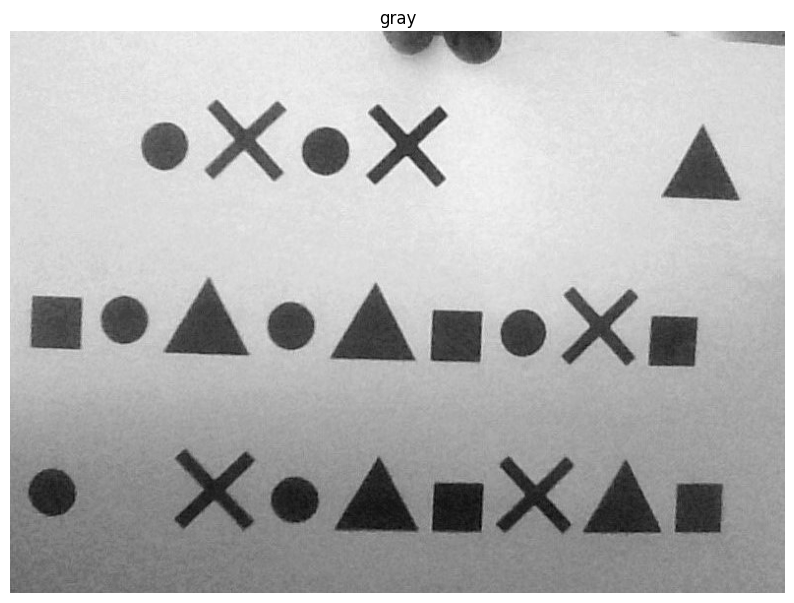

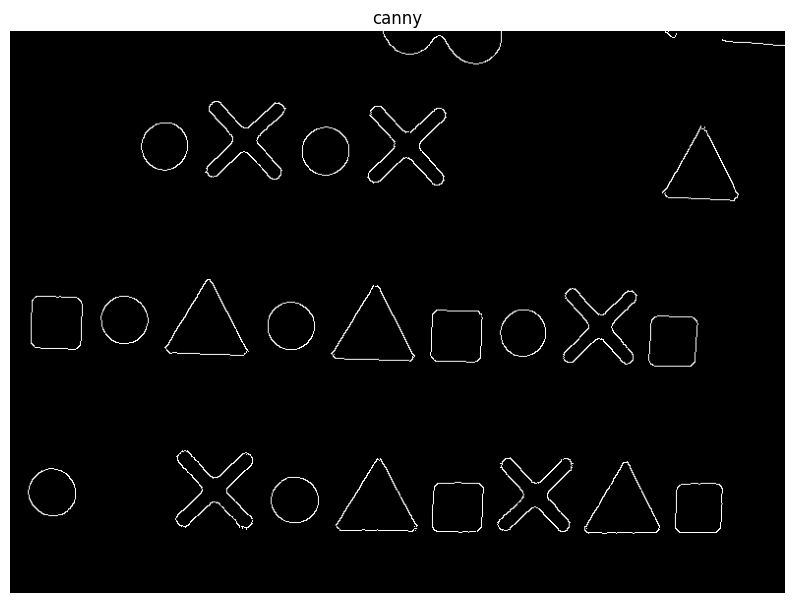

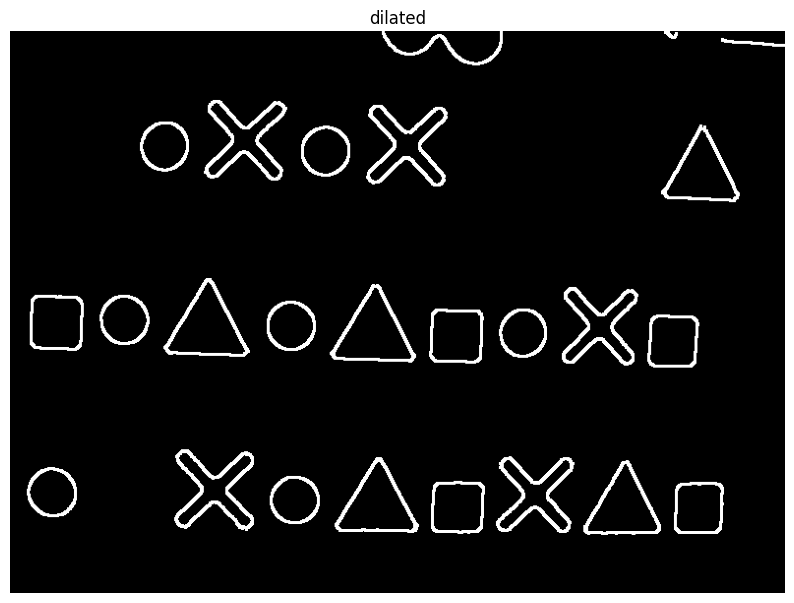

In [83]:
img = cv.imread('input/real4.png')
img_copy = img.copy()
#display_image(img_copy)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
display_image(gray,"gray")
gaussian = cv.GaussianBlur(gray, (9, 9), 0)
#display_image(gaussian,"gaussian_blur_stronger")

median = cv.medianBlur(gaussian, 9)
#display_image(median,"median+ gauusian")

canny = cv.Canny(median,15,40)
display_image(canny,"canny")

kernel = np.ones((3, 3), np.uint8)
dilated = cv.dilate(canny, kernel, iterations=1)
display_image(dilated ,"dilated")

Number of contours 22
[[[691 458]]

 [[690 459]]

 [[689 459]]

 [[688 459]]

 [[687 459]]

 [[686 459]]

 [[685 459]]

 [[684 459]]

 [[683 459]]

 [[682 459]]

 [[681 459]]

 [[680 460]]

 [[679 460]]

 [[678 461]]

 [[677 462]]

 [[677 463]]

 [[677 464]]

 [[676 465]]

 [[676 466]]

 [[676 467]]

 [[676 468]]

 [[676 469]]

 [[676 470]]

 [[676 471]]

 [[676 472]]

 [[676 473]]

 [[676 474]]

 [[676 475]]

 [[676 476]]

 [[676 477]]

 [[676 478]]

 [[676 479]]

 [[676 480]]

 [[676 481]]

 [[676 482]]

 [[676 483]]

 [[676 484]]

 [[676 485]]

 [[676 486]]

 [[676 487]]

 [[676 488]]

 [[675 489]]

 [[675 490]]

 [[675 491]]

 [[675 492]]

 [[675 493]]

 [[675 494]]

 [[675 495]]

 [[675 496]]

 [[675 497]]

 [[675 498]]

 [[675 499]]

 [[675 500]]

 [[675 501]]

 [[675 502]]

 [[675 503]]

 [[675 504]]

 [[675 505]]

 [[675 506]]

 [[676 507]]

 [[677 508]]

 [[678 509]]

 [[679 510]]

 [[680 510]]

 [[681 510]]

 [[682 510]]

 [[683 510]]

 [[684 510]]

 [[685 510]]

 [[686 510]]

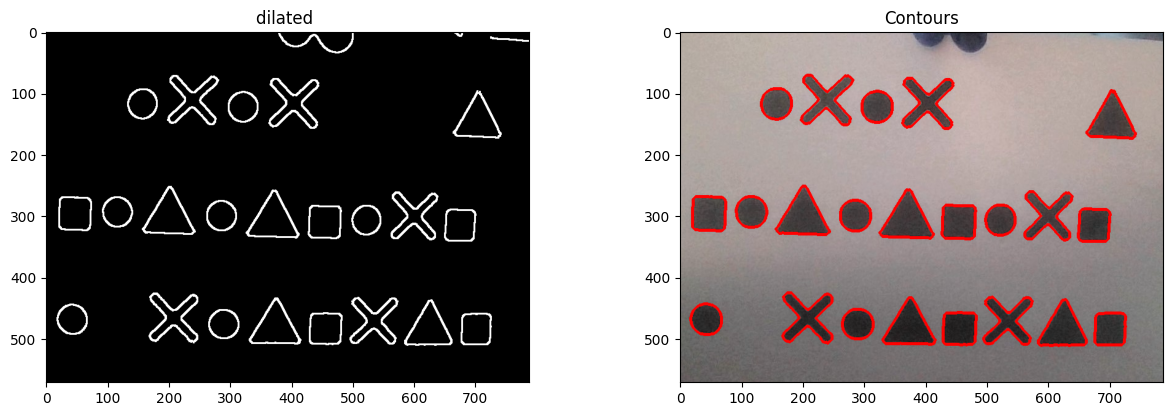

In [90]:

contours, hierarchy = cv.findContours(dilated , cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
filtered_contours = []

min_area = 1000
for contour in contours:
    area = cv.contourArea(contour)
    if area > min_area:
        filtered_contours.append(contour)


cv.drawContours(img_copy, filtered_contours, -1, (255, 0, 0), 3)

print(f"Number of contours {len(filtered_contours)}")
print(filtered_contours[0])
images = [dilated, img_copy]
titles = ["dilated ", "Contours"]
plots = [2, 2]
size = (15, 10)
make_fig_gray(images, titles, plots, size)

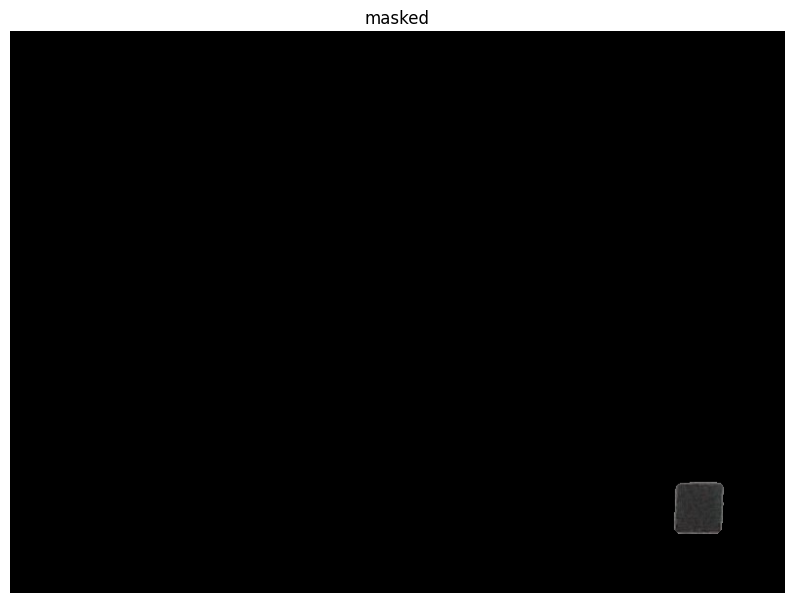

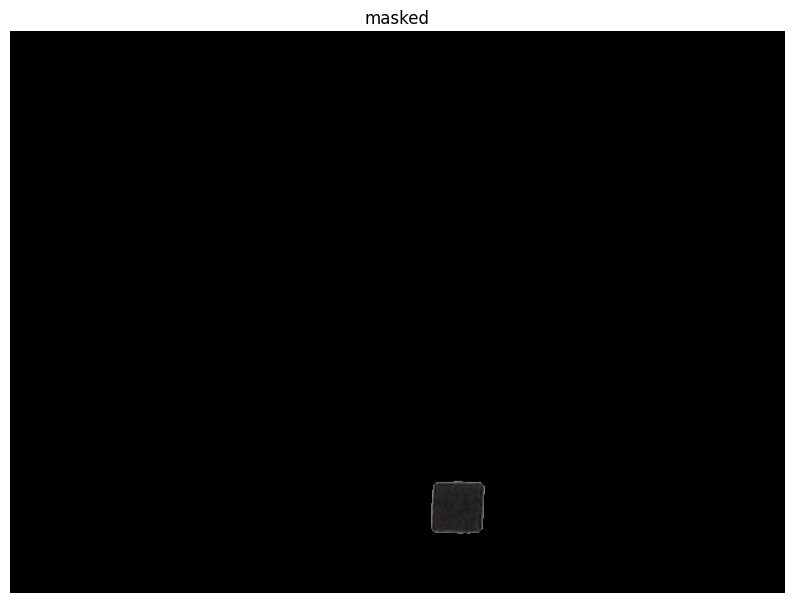

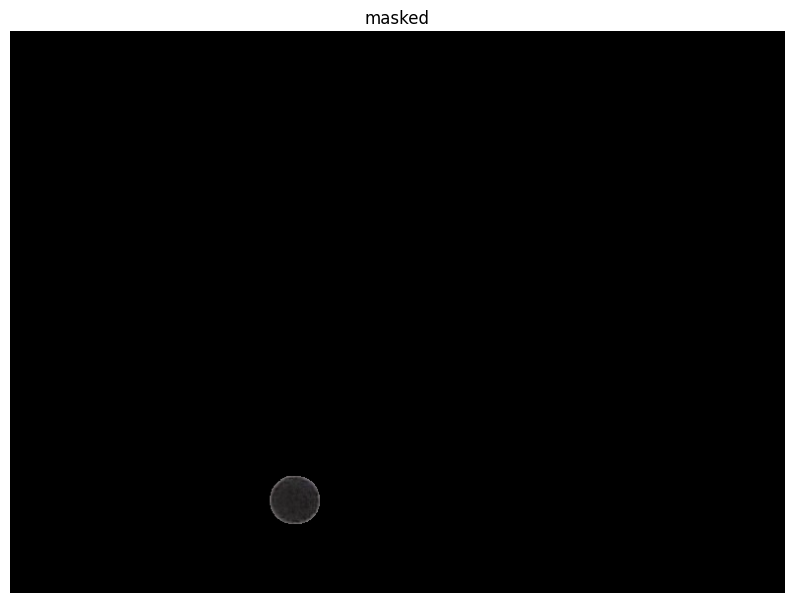

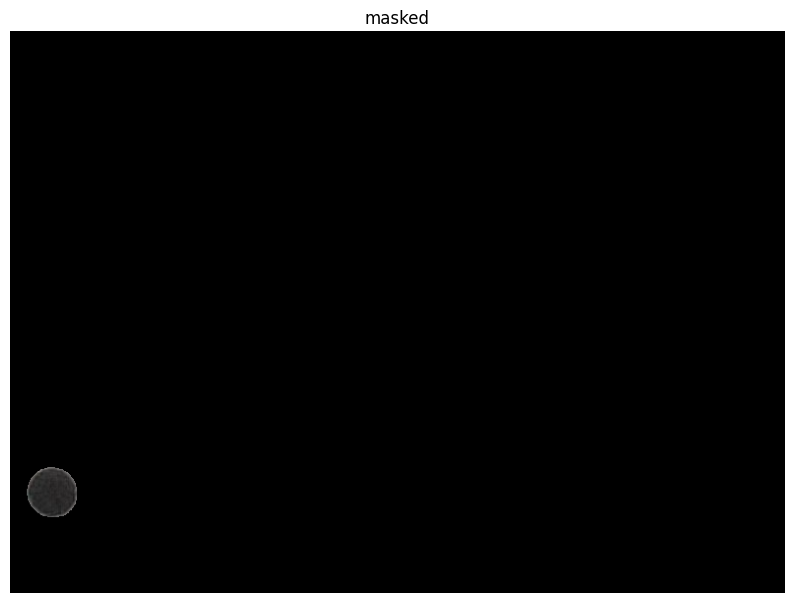

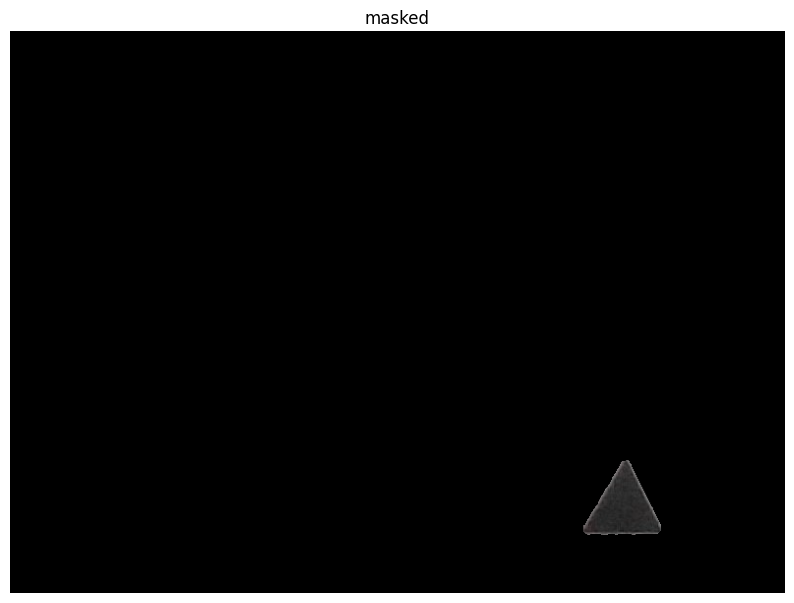

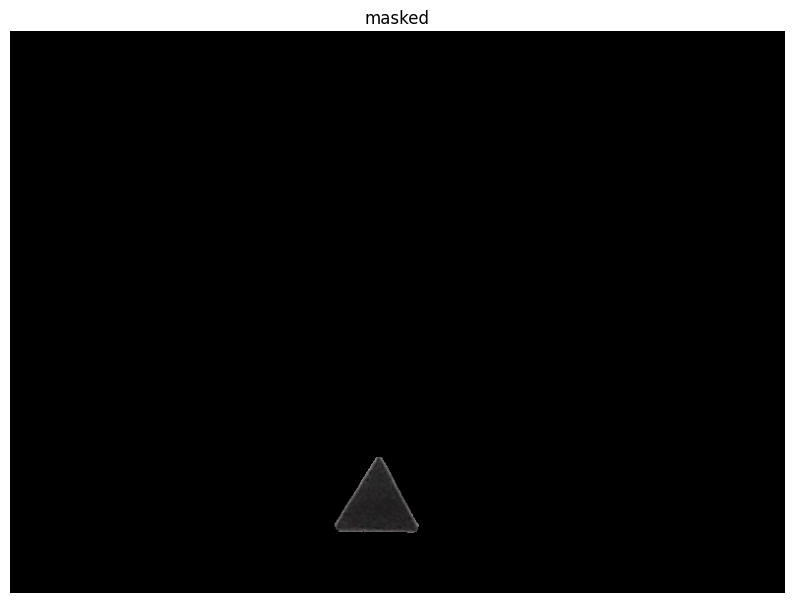

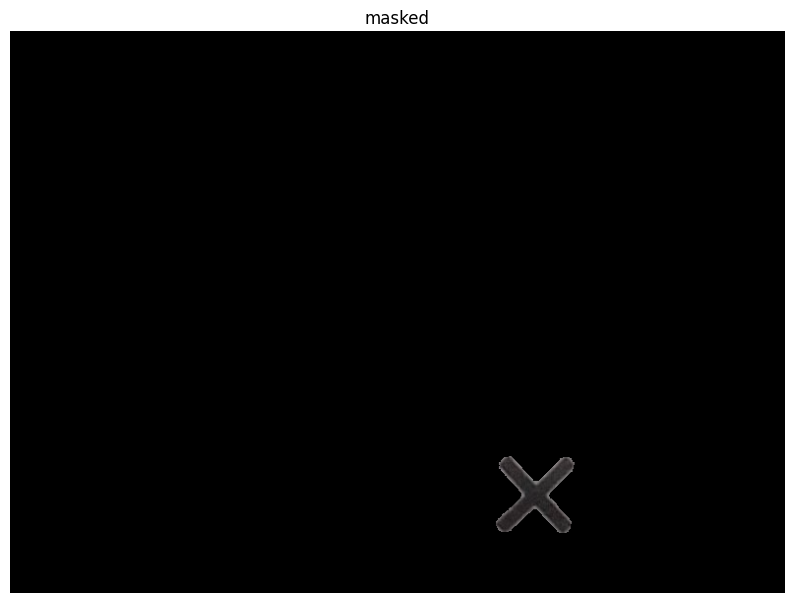

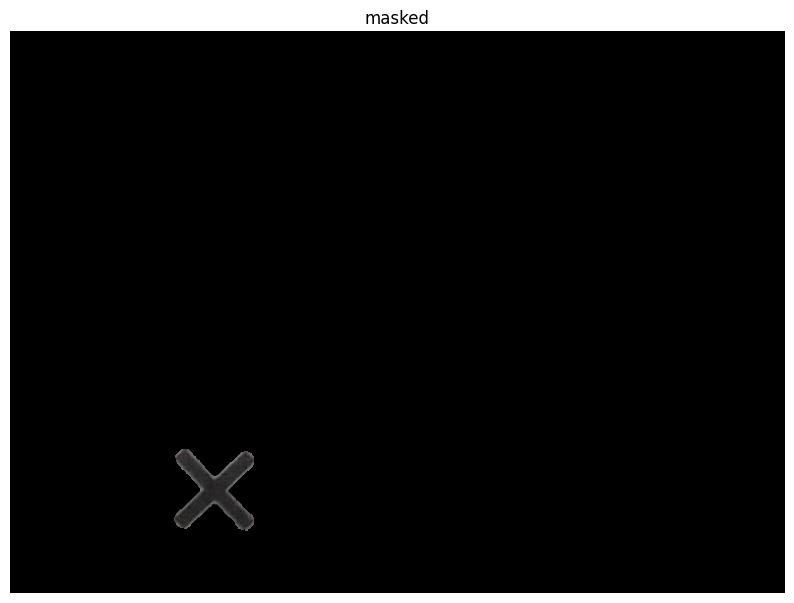

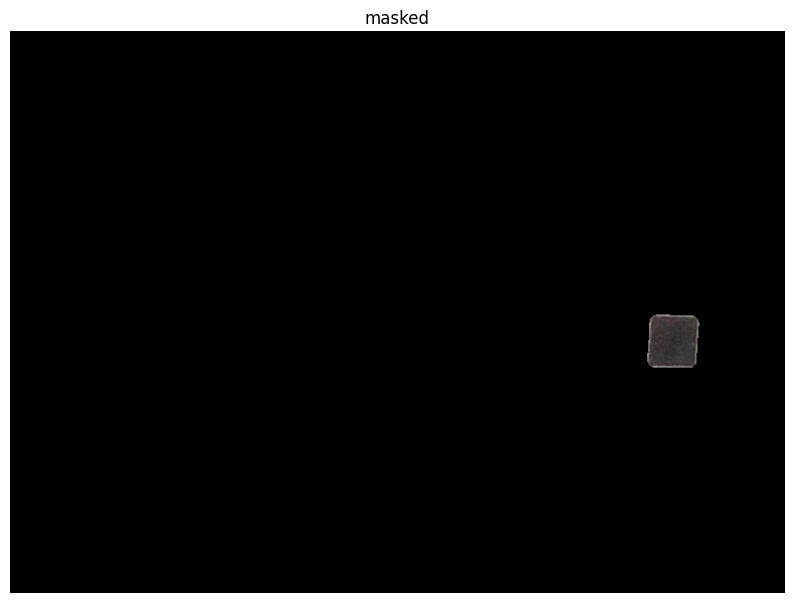

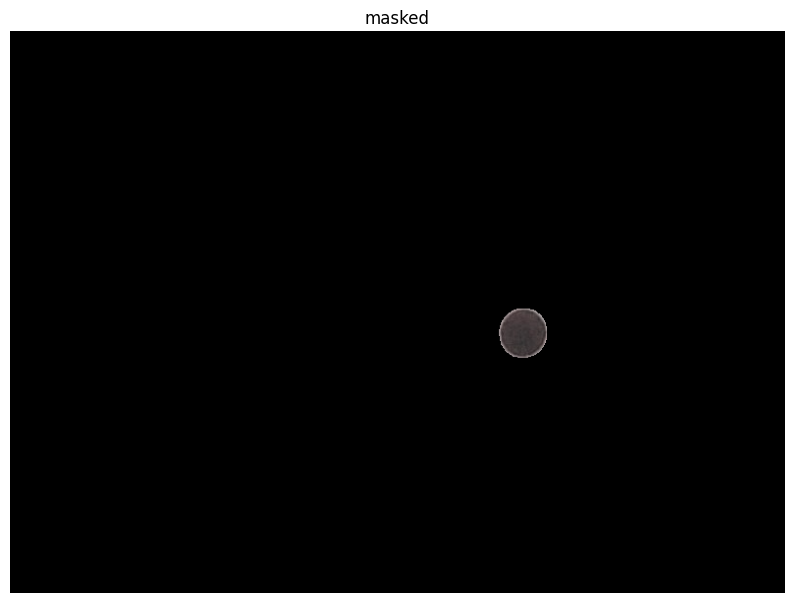

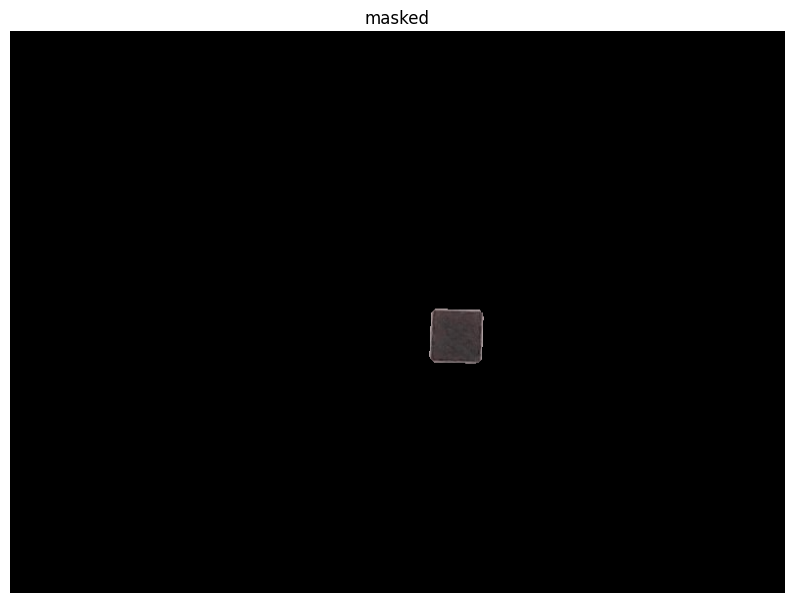

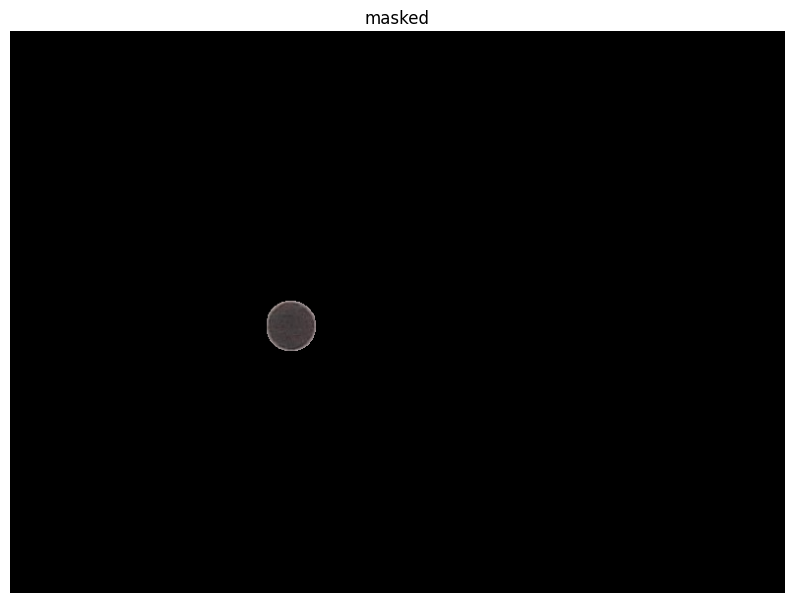

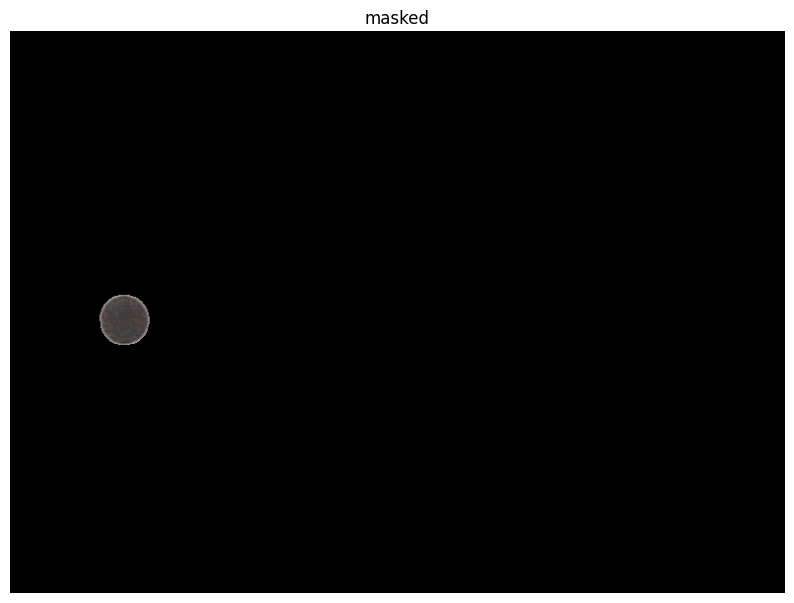

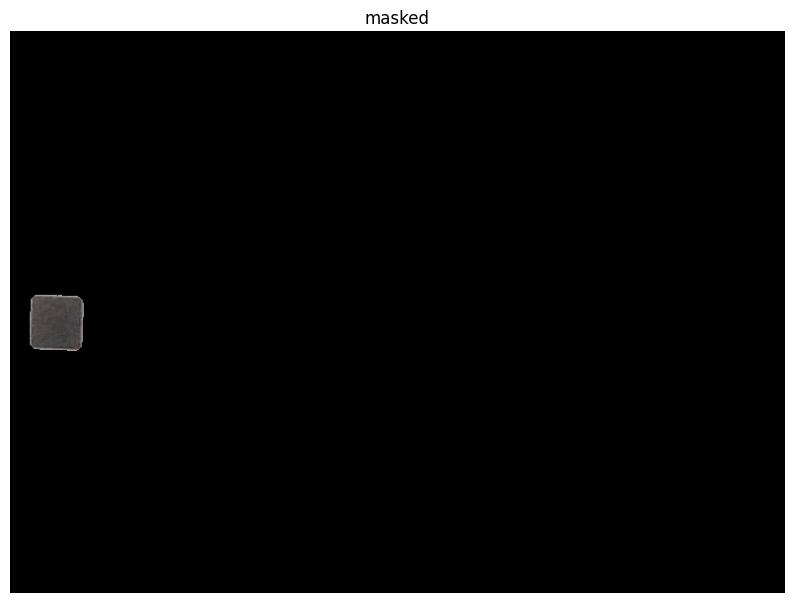

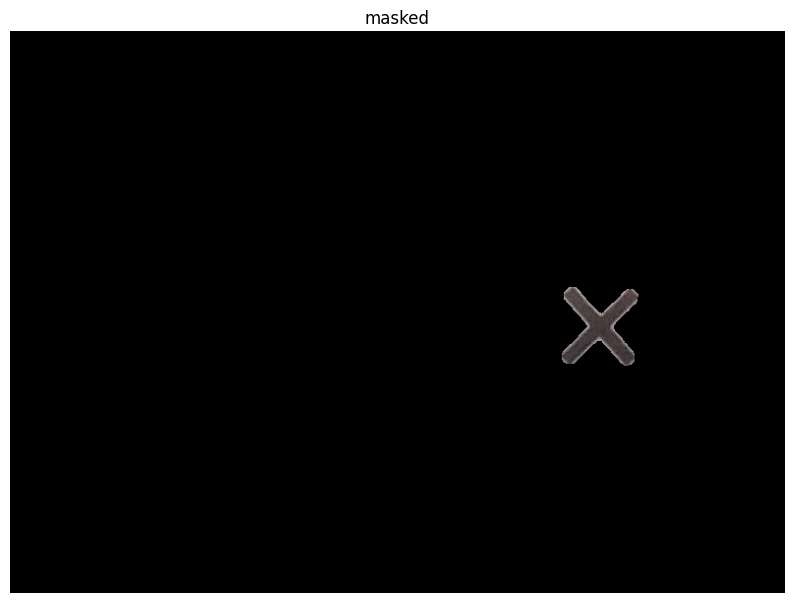

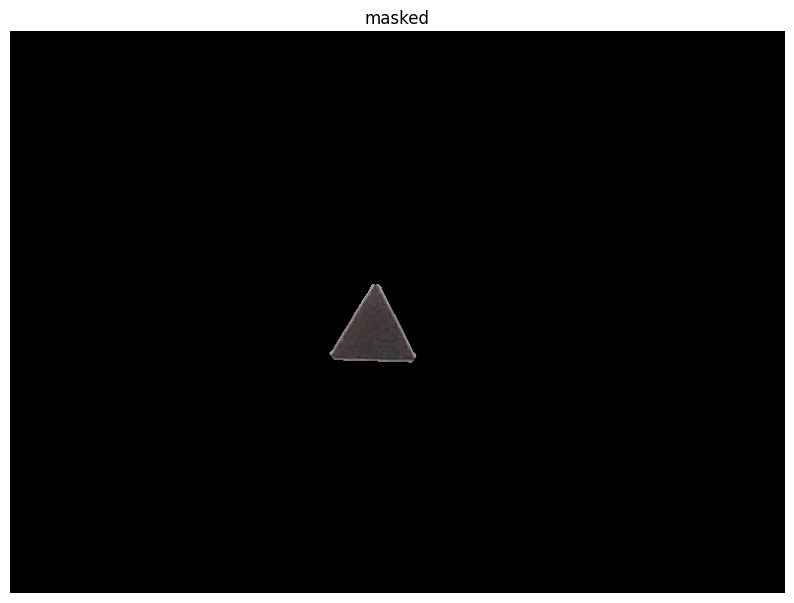

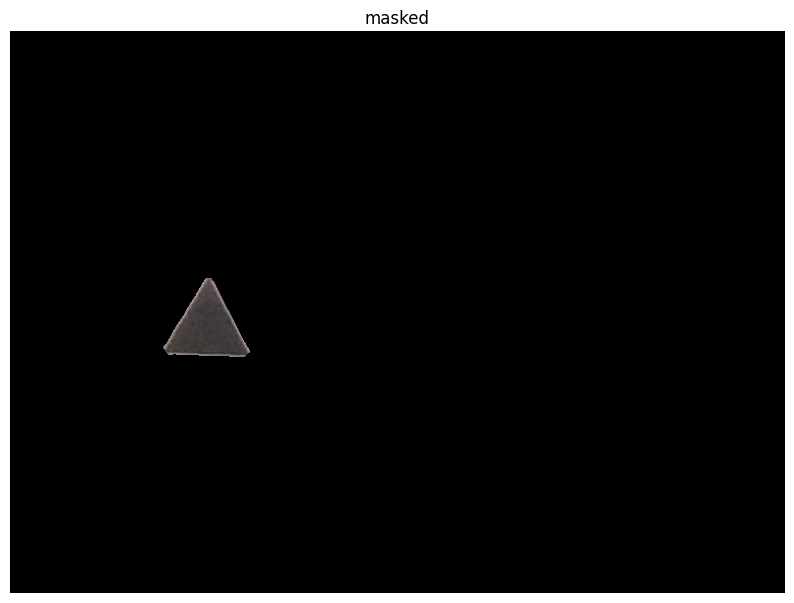

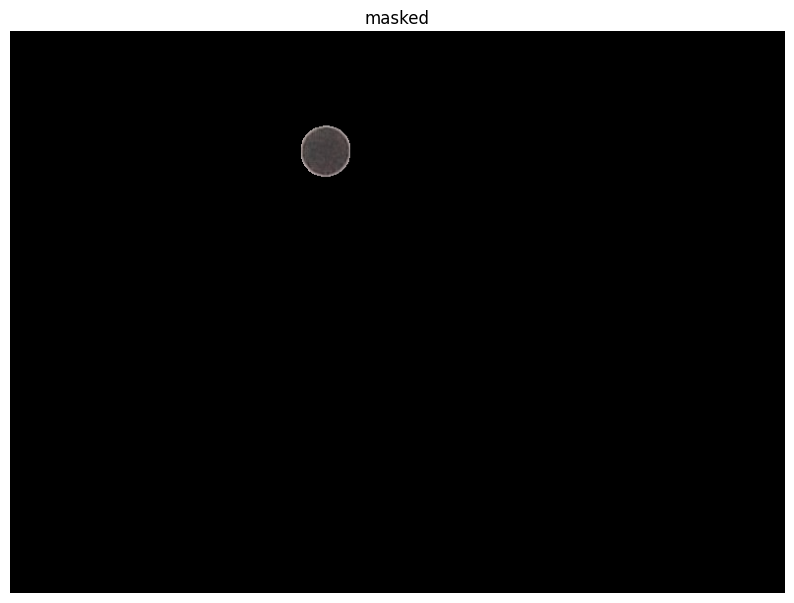

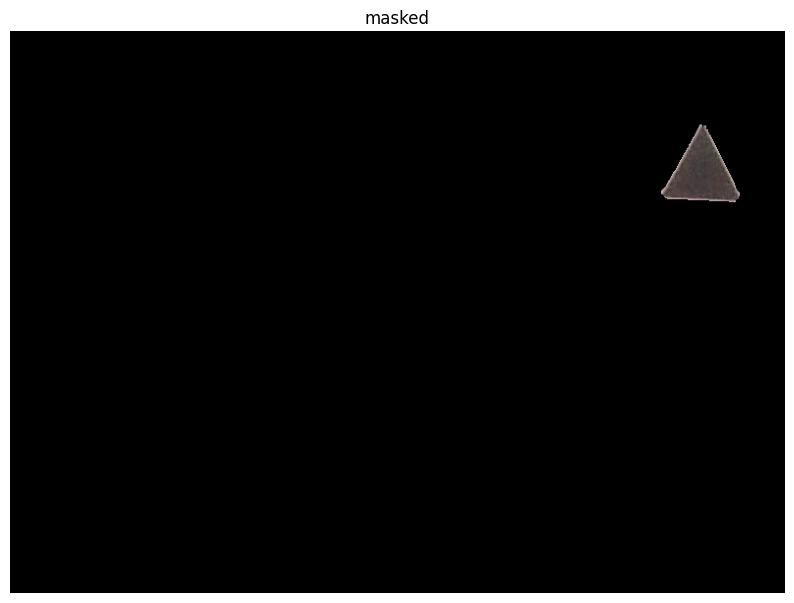

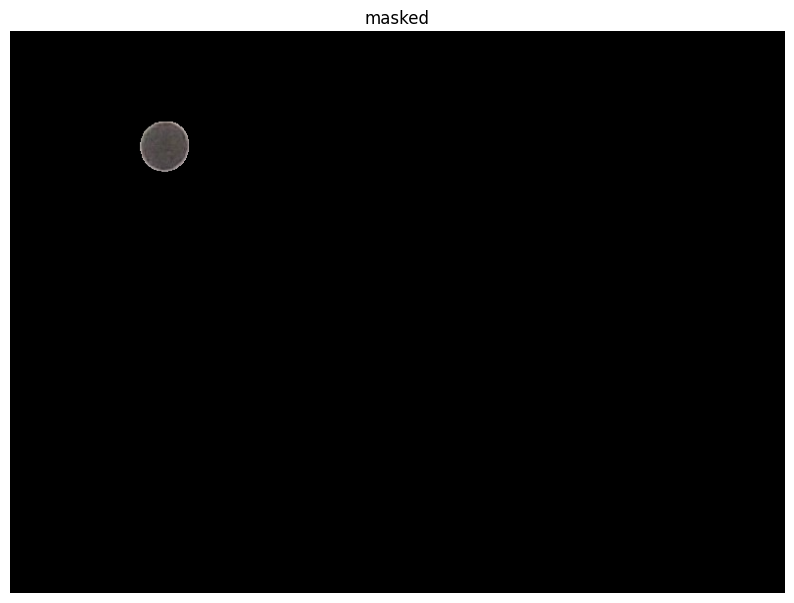

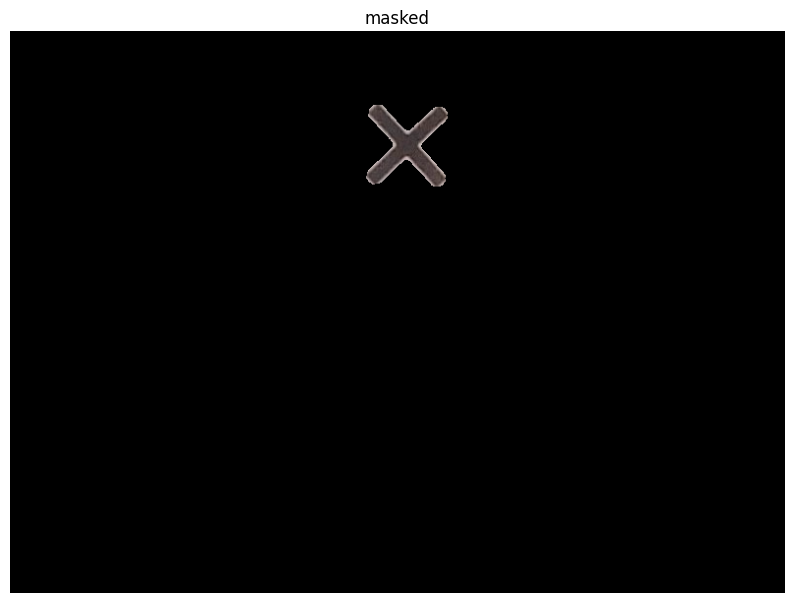

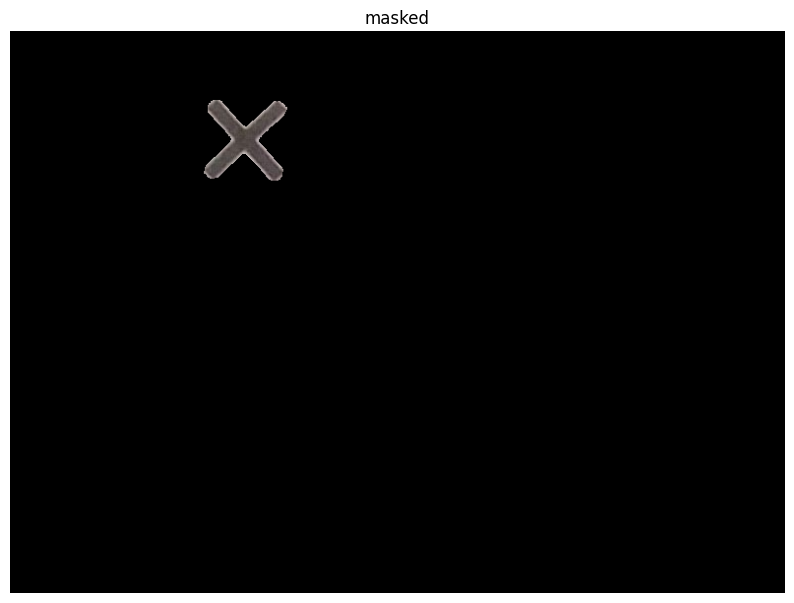

In [85]:
for contour in filtered_contours:
    # Create empty mask
    mask = np.zeros(img.shape[:2], np.uint8)
    
    # Draw each contour on mask
    cv.drawContours(mask, [contour],-1, 255, -1)

    # Apply mask to image
    masked = cv.bitwise_and(img, img, mask=mask)

    display_image(masked,"masked")